<a href="https://colab.research.google.com/github/Pushkar004/Data_Science_Projects/blob/main/Project2_Amazon_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Learn_tube/ratings_Electronics.csv')

In [4]:
df                                             #no column name and first row of data is used as column name

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [5]:
 #Giving proper column name from metadata available in kaggle website and also reading 1st row as data and not header

df1 = pd.read_csv('/content/drive/MyDrive/Learn_tube/ratings_Electronics.csv', header=None, names=['UserID', 'ProductID', 'Rating','Timestamp'])

In [6]:
df1

,UserID,ProductID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     object 
 1   ProductID  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
df1.describe()

,Rating,Timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [9]:
df1.columns

Index(['UserID', 'ProductID', 'Rating', 'Timestamp'], dtype='object')

In [10]:
df1=df1.drop(['Timestamp'],axis=1)

In [11]:
df1

,UserID,ProductID,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [12]:
df1.isnull().sum()                                                                                   # No null values

,0
UserID,0
ProductID,0
Rating,0


In [13]:
duplicate_rows = df1[df1.duplicated()]

# Display the duplicate rows
print(duplicate_rows)                               # No duplicate rows

Empty DataFrame
Columns: [UserID, ProductID, Rating]
Index: []


# **Statistical Analysis of Data**

# ***Total Rating of user***

In [14]:
df1['Rating'].value_counts()

,count
Rating,
5.0,4347541
4.0,1485781
1.0,901765
3.0,633073
2.0,456322


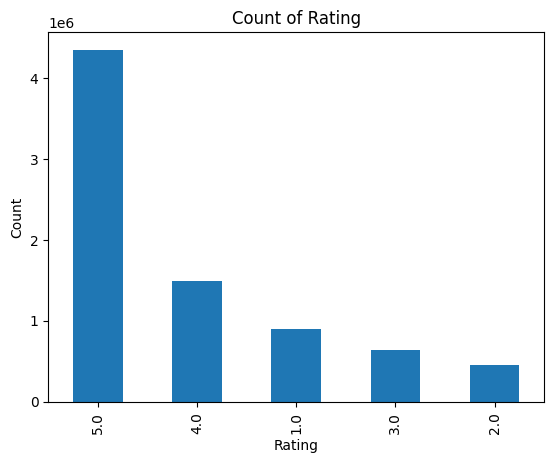

In [15]:
import matplotlib.pyplot as plt

# Plot the value counts
df1['Rating'].value_counts().plot(kind='bar')

# Display the plot
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Rating')
plt.show()


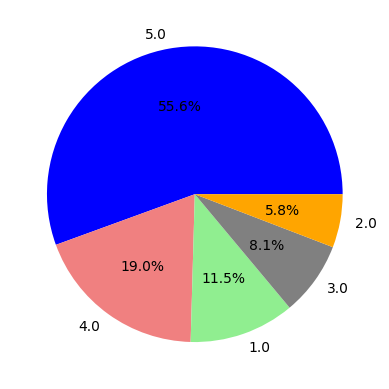

In [16]:
# Plot the pie chart to check proportion share of the rating
plt.pie(df1['Rating'].value_counts(),colors = ['blue','lightcoral', 'lightgreen', 'grey','orange'], labels=df1['Rating'].value_counts().index, autopct='%1.1f%%')    #autopct '%1.1f%%' gives percentage with 1 decimal place

# Display the pie chart
plt.show()

# **Observation :**

 **Majority rating(55.6%) given by user is 5.0. While rating 2.0 is appeared minimum(5.8%)**

# ***Avearge Rating groupby user***

In [17]:
# Average rating by user
user_avg_rating = df1.groupby('UserID')['Rating'].mean()


In [18]:
user_avg_rating_df = pd.DataFrame({'UserID': user_avg_rating.index, 'Average Rating': user_avg_rating.values})

In [19]:
user_avg_rating_df

,UserID,Average Rating
0,A00000262KYZUE4J55XGL,5.000000
1,A000063614T1OE0BUSKUT,5.000000
2,A00009182QVLSWIGHLS1B,5.000000
3,A00009661LC9LQPGKJ24G,5.000000
4,A00010809P09NUU6ZP6H,5.000000
...,...,...
4201691,AZZZOVIBXHGDR,3.333333
4201692,AZZZRS1YZ8HVP,4.000000
4201693,AZZZSIK7NFFVP,5.000000
4201694,AZZZWXXUPZ1F3,5.000000


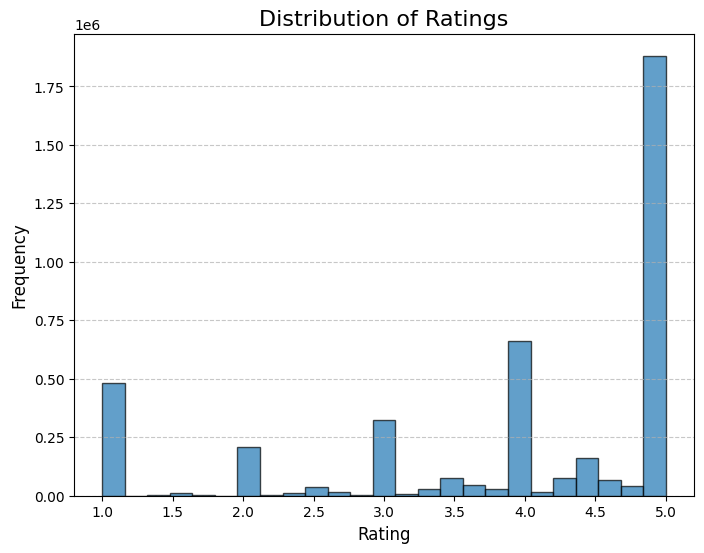

In [20]:

plt.figure(figsize=(8, 6))                                                                    #plot for average rating given by user
plt.hist(user_avg_rating, bins=25, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-21-12c333a0aaac>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(user_avg_rating_df['Average Rating'], shade=True)


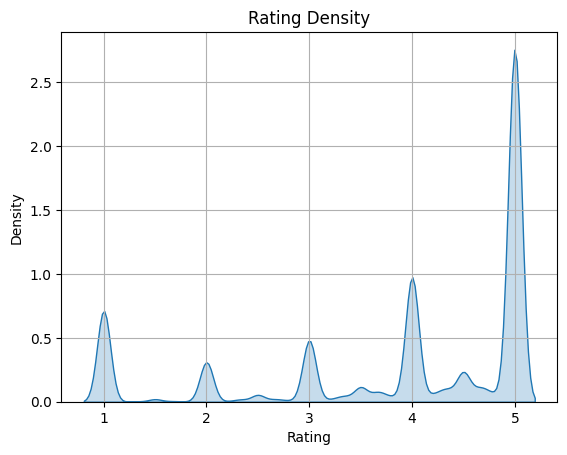

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt                                         # kdeplot(more smoother distribution) for average rating given by user

sns.kdeplot(user_avg_rating_df['Average Rating'], shade=True)
plt.title('Rating Density')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# **Observation :**

**Average rating per user also follows the same trend as total rating with peak at rating 5.0.**

# ***Average Rating groupby Product***

In [22]:
productct_avg_rating = df1.groupby('ProductID')['Rating'].mean()

In [23]:
productct_avg_rating

,Rating
ProductID,
0132793040,5.000000
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
...,...
BT008G3W52,5.000000
BT008SXQ4C,1.000000
BT008T2BGK,5.000000


In [24]:
print(productct_avg_rating.nlargest(50))                                                       # Top 50 product by average rating

ProductID
0132793040    5.0
0321732944    5.0
059400232X    5.0
0594033934    5.0
0594287995    5.0
0594450209    5.0
0594450705    5.0
0594511488    5.0
0594514789    5.0
0594549558    5.0
0777700018    5.0
094339676X    5.0
0986987662    5.0
1039869017    5.0
1182702627    5.0
1575839415    5.0
1593152523    5.0
1594243034    5.0
1604550945    5.0
1610130804    5.0
1615598790    5.0
1616813822    5.0
1616825855    5.0
1616831022    5.0
1616833742    5.0
1616855711    5.0
1616865059    5.0
1616873973    5.0
1685560156    5.0
1932836470    5.0
1933622474    5.0
1934805912    5.0
193886722X    5.0
2059500001    5.0
2724270592    5.0
3281220487    5.0
3744295478    5.0
3777000302    5.0
3902217138    5.0
5891057808    5.0
6000001134    5.0
6000007388    5.0
6000007469    5.0
6000011474    5.0
6000090188    5.0
6010098858    5.0
6025005516    5.0
6025005559    5.0
6162122646    5.0
6185553570    5.0
Name: Rating, dtype: float64


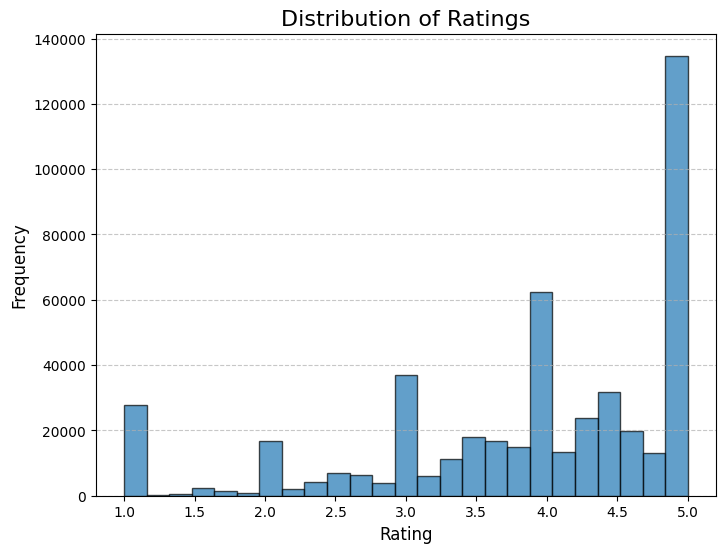

In [25]:

plt.figure(figsize=(8, 6))                                                                    #plot for average rating per product given by user
plt.hist(productct_avg_rating, bins=25, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-26-fc14fbd83803>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(user_avg_rating_df['Average Rating'], shade=True)


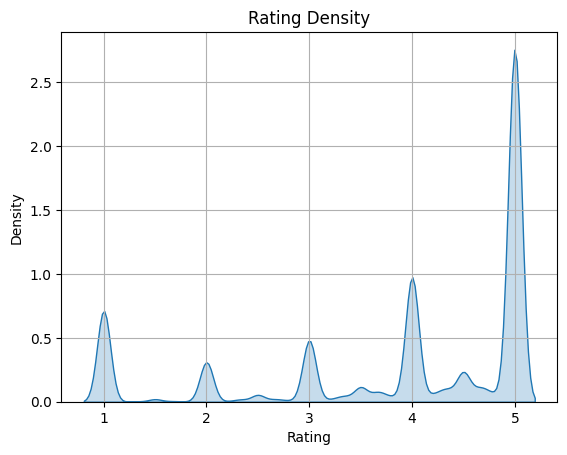

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt                                         # kdeplot for average rating per product given by user

sns.kdeplot(user_avg_rating_df['Average Rating'], shade=True)
plt.title('Rating Density')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# **Observation :**

**Average rating per product also follows the same trend as total rating with peak at rating 5.0.**

# **Popularity Based recommendation System**

**For recommendation system we are using product that has rating count more than 50**

In [27]:
df1.columns

Index(['UserID', 'ProductID', 'Rating'], dtype='object')

In [28]:
#Taking product having rating more than or equal to 50
significant_product=df1.groupby('ProductID').filter(lambda x:x['Rating'].count()>=50)

In [29]:
significant_product

,UserID,ProductID,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
7824223,A2857SW4TZ841C,B00L3YHF6O,1.0
7824224,A2Y2NSH2HVFAOA,B00L3YHF6O,5.0
7824225,A3TC2716OF7HK8,B00L3YHF6O,5.0
7824226,AYCPSPX7XZ21G,B00L3YHF6O,5.0


In [30]:
#Alternatively taking significant product to be sure

#Grouping productID and counting the number of ratings
rating_count = df1.groupby('ProductID').size().reset_index(name='RatingCount')

#Filtering products that have been rated more than or equal to 50 times
filtered_products = rating_count[rating_count['RatingCount'] >= 50]['ProductID']

#Filter the original DataFrame to keep only the products with more than 50 ratings
significant_product_df = df1[df1['ProductID'].isin(filtered_products)]

print(significant_product_df.head())

             UserID   ProductID  Rating
183  A1BKC6B7YHYTVV  0972683275     4.0
184   AWVFSIB42LHKJ  0972683275     4.0
185  A36MQBNADRH8YY  0972683275     5.0
186  A3SRXMPLAEZ6DP  0972683275     4.0
187  A20XXTXWF2TCPY  0972683275     5.0


In [31]:
significant_product_df

,UserID,ProductID,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
7824223,A2857SW4TZ841C,B00L3YHF6O,1.0
7824224,A2Y2NSH2HVFAOA,B00L3YHF6O,5.0
7824225,A3TC2716OF7HK8,B00L3YHF6O,5.0
7824226,AYCPSPX7XZ21G,B00L3YHF6O,5.0


In [32]:
#sorted signifcant product in descending order of rating count

Rating_count_per_product=significant_product_df.groupby('ProductID')['Rating'].count().sort_values(ascending=False)

In [33]:
Rating_count_per_product

,Rating
ProductID,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
...,...
B002653KNQ,50
B001W81LZ2,50
B0001G6UES,50


In [34]:
Rating_count_per_product.describe()

,Rating
count,26226.000000
mean,204.923092
std,437.950769
min,50.000000
25%,67.000000
50%,100.000000
75%,188.000000
max,18244.000000


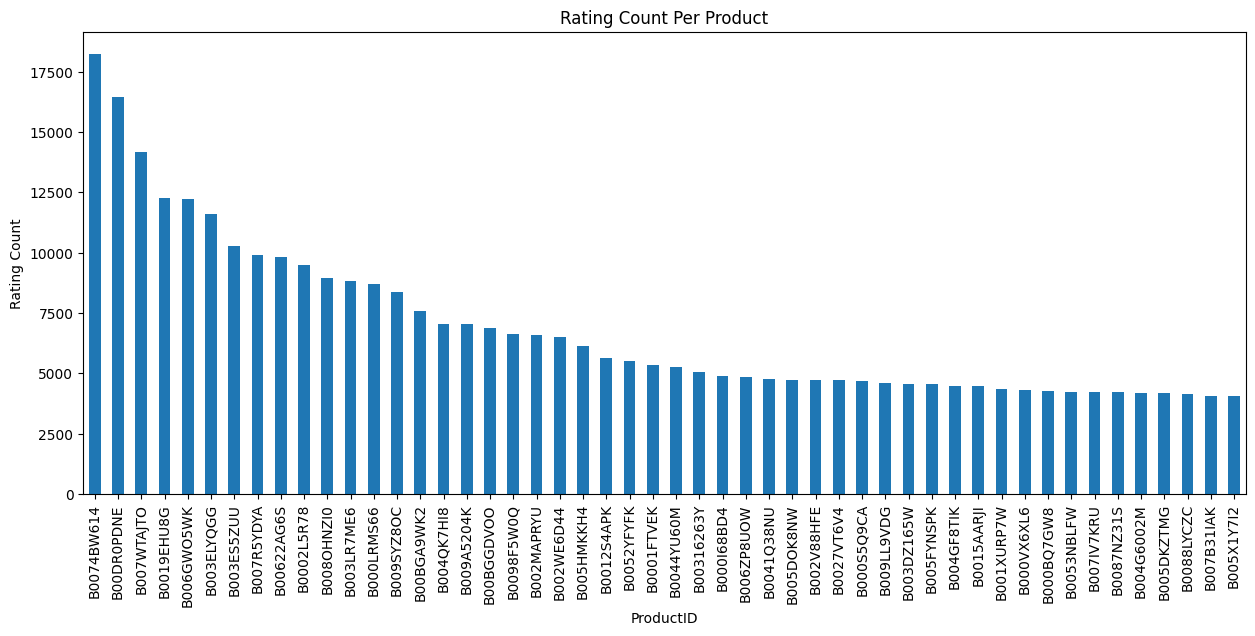

In [35]:
# Plot top50 product
plt.figure(figsize=(15, 6))
Rating_count_per_product.head(50).plot(kind='bar')

# Display the plot

plt.xlabel('ProductID')
plt.ylabel('Rating Count')
plt.title('Rating Count Per Product')
plt.show()


In [36]:
#Average rating group

significant_product_avg_rating = significant_product_df.groupby('ProductID')['Rating'].mean()
significant_product_avg_rating_df = pd.DataFrame({'ProductID': significant_product_avg_rating.index, 'Average Rating': significant_product_avg_rating.values})

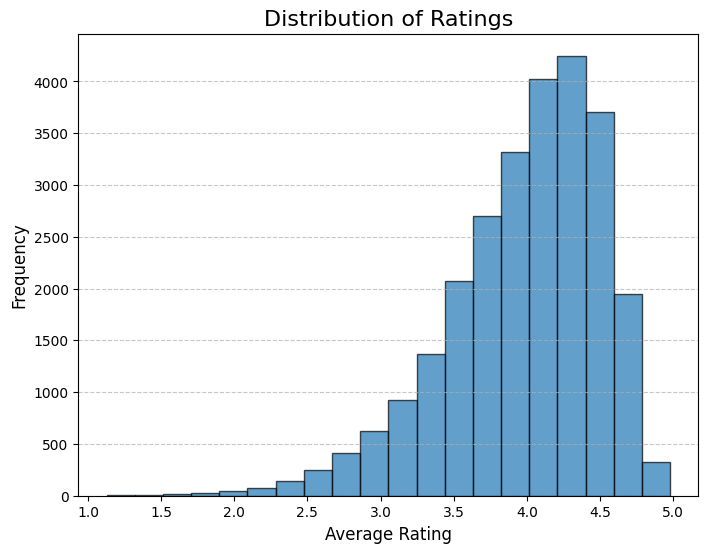

In [37]:

plt.figure(figsize=(8, 6))                                                                              #plot for average rating per product given by user
plt.hist(significant_product_avg_rating_df['Average Rating'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-38-712d85cfc87e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(significant_product_avg_rating_df['Average Rating'], shade=True)              #kdeplot for smoother distribution


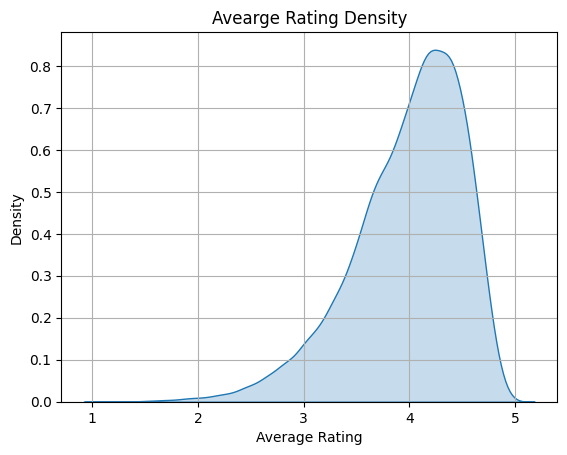

In [38]:

sns.kdeplot(significant_product_avg_rating_df['Average Rating'], shade=True)              #kdeplot for smoother distribution
plt.title('Avearge Rating Density')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [39]:
significant_product_avg_rating_df['Average Rating'].skew()          #checking skewness of average rating per product

-0.9512537061128555

In [40]:
significant_product_avg_rating_df

,ProductID,Average Rating
0,0972683275,4.470980
1,1400501466,3.560000
2,1400501520,4.243902
3,1400501776,3.884892
4,1400532620,3.684211
...,...,...
26221,B00KFAGCUM,4.824427
26222,B00KGGJPX6,4.592593
26223,B00KINSDK8,3.576923
26224,B00KWHMR6G,3.637931


Observation: The average rating is highly negatively skewed

In [41]:
significant_product_avg_rating_df['Rating count']=significant_product_df.groupby('ProductID')['Rating'].transform('count')

In [42]:
significant_product_avg_rating_df

,ProductID,Average Rating,Rating count
0,0972683275,4.470980,NaN
1,1400501466,3.560000,NaN
2,1400501520,4.243902,NaN
3,1400501776,3.884892,NaN
4,1400532620,3.684211,NaN
...,...,...,...
26221,B00KFAGCUM,4.824427,268.0
26222,B00KGGJPX6,4.592593,268.0
26223,B00KINSDK8,3.576923,268.0
26224,B00KWHMR6G,3.637931,268.0


In [43]:
# creating dataframe with average rating and rating count groupby productID

significant_product_df2=significant_product_df.groupby('ProductID').agg(average_rating=('Rating', 'mean'),rating_count=('Rating', 'count')).reset_index()

In [44]:
significant_product_df2.describe()                                               # displaying statistics for average rating and rating count

,average_rating,rating_count
count,26226.000000,26226.000000
mean,3.980288,204.923092
std,0.527460,437.950769
min,1.127273,50.000000
25%,3.677881,67.000000
50%,4.074805,100.000000
75%,4.375000,188.000000
max,4.980392,18244.000000


In [45]:
correlation = significant_product_df2['average_rating'].corr(significant_product_df2['rating_count'])

print("Correlation between Rating and Rating Count:", correlation)

Correlation between Rating and Rating Count: 0.07358807628426929


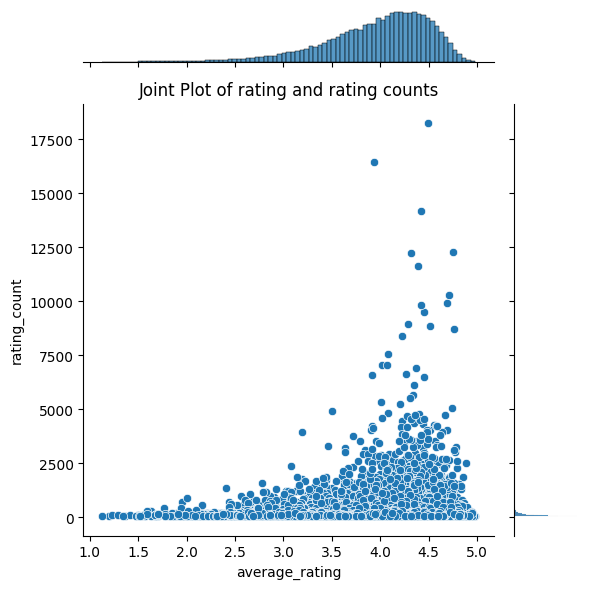

In [46]:
#joint plot of rating and rating counts
sns.jointplot(x='average_rating',y='rating_count',data=significant_product_df2)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

**Observation: The correlation between average rating and rating is positive but weak. In graph we can see that altough the relationship is not linear but the pattern is similar with similar curve**

# **Collaberative filtering (Item-Item recommedation)**

In [47]:
!pip install surprise

In [48]:
#importing surprise libraries

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [49]:
significant_product_df.shape

(5374313, 3)

In [50]:
#taking smaller sample to fit memory capabilities

significant_product_df2=significant_product_df.sample(500000)

In [51]:
#Reading the dataset
reader_surprise = Reader(rating_scale=(1, 5))                                                # as rating is from 1 to 5. scale is takien accordingly
surprise_data = Dataset.load_from_df(significant_product_df2,reader_surprise)

In [52]:
#Splitting surprise the dataset into 70,30 ratio using train_test_split
train_data, test_data = train_test_split(surprise_data, test_size=0.3,random_state=4)

In [53]:
# user_based true/false is used to switch between user-based or item-based collaborative filtering
model = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
model.fit(train_data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [54]:
#Prediction
test_prediction=model.test(test_data)

In [55]:
#print RMSE
print("RMSE on test data")
accuracy.rmse(test_prediction ,verbose=True)

RMSE on test data
RMSE: 1.3464


1.34644567085789

# **Model-based collaborative filtering system**

In [56]:
significant_product_df2.columns

Index(['UserID', 'ProductID', 'Rating'], dtype='object')

In [57]:
#taking smaller sample to fit memory capabilities

significant_product_df3=significant_product_df.sample(20000)

In [58]:
#Created a pivot table of the rating where the value of the column is rating and index is userId and the column is productId
rating_pivot_table= significant_product_df3.pivot_table(values='Rating', index='UserID', columns='ProductID', fill_value=0)
rating_pivot_table.head()

ProductID,0972683275,1400501520,1400532620,1400532655,140053271X,1400599997,9625993428,B000001ON6,B00000DM9W,B00000IGBF,...,B00IVPU786,B00IWJUGQY,B00IX2VGFA,B00IZBNQO8,B00J5174TU,B00J5HDEPC,B00J8E8YES,B00JC5Y6YA,B00JTI4X3E,B00KGGJPX6
UserID,,,,,,,,,,,,,,,,,,,,,
A00227042NE1WG1BPME76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00445086HQKHWW2FUPT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0093195LDK7PKG7RK9Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A013081733QA0JWX5O0B3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02970121VCH64N53W9F4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#check the shape of the rating_matrix
rating_pivot_table.shape

(19854, 10392)

In [60]:
#transposing the matrix to make productId as index and index as userId
x_ratings_matrix=rating_pivot_table.T
x_ratings_matrix.head()

UserID,A00227042NE1WG1BPME76,A00445086HQKHWW2FUPT,A0093195LDK7PKG7RK9Q,A013081733QA0JWX5O0B3,A02970121VCH64N53W9F4,A031533437UL5KXSH8FNB,A03765451LCS41DO5OQ2W,A038024531TN8WN9JEN32,A04083442Q9UHO0GEMFJ6,A04245543M72JE047TVGJ,...,AZY5WADV3UWQU,AZYCXUU5QI0OY,AZYJJNKKB9NK8,AZYLRGMTXV3T7,AZYQRMH8LLU8J,AZYYUCMIK4Y4Z,AZZ447TDAT01Y,AZZMHJOV6T15J,AZZUFX1N0N4XT,AZZVYHVJ8BDUZ
ProductID,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
x_ratings_matrix.shape

(10392, 19854)

In [62]:
#Decomposition of the matrix using SVD
from sklearn.decomposition import TruncatedSVD
SVD_model = TruncatedSVD(n_components=10)
decomposed_matrix = SVD_model.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(10392, 10)

In [63]:
#Correlation Matrix
import numpy as np
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(10392, 10392)

In [64]:
x_ratings_matrix.index[5]                         #taking one sample record of productID for recommendation

'1400599997'

In [65]:
i="B00001P4ZH"
product_name=list(x_ratings_matrix.index)
product_id=product_name.index(i)
print(product_id)

23


In [66]:
correlated_productID = correlation_matrix[product_id]
correlated_productID.shape

(10392,)

In [67]:
correlation_matrix[correlated_productID>0.75].shape

(1650, 10392)

In [68]:
#Recommending top 20 highly correlated products in sequence
recommendation_list = list(x_ratings_matrix.index[correlated_productID > 0.75])
recommendation_list[:20]

['B00000K2YR',
 'B00001OWYM',
 'B00001P4ZH',
 'B00003CWDH',
 'B00004SPUN',
 'B00004SQET',
 'B00004T1XK',
 'B00004T8R2',
 'B00004TWM6',
 'B00004TYBM',
 'B00004VXNI',
 'B00004W3YX',
 'B00004WCGC',
 'B00004WCIC',
 'B00004XO1V',
 'B00004Z0BN',
 'B00004Z476',
 'B00004ZC8Y',
 'B00004ZCAT',
 'B00004ZCKV']